In [1]:
# LOAD THE REQUIRED LIBRARIES 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import fancyimpute
from fancyimpute import KNN
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor
import xgboost as xgb

ModuleNotFoundError: No module named 'fancyimpute'

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from fancyimpute import KNN
import warnings
warnings.filterwarnings('ignore')
from geopy.distance import geodesic
from geopy.distance import great_circle
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.externals import joblib

ModuleNotFoundError: No module named 'fancyimpute'

In [3]:
#!pip install fancyimpute

In [4]:
import platform 

In [5]:
print(platform.python_version())

3.7.4


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib

C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
from geopy.distance import geodesic
from geopy.distance import great_circle

ModuleNotFoundError: No module named 'geopy'

In [5]:
##Load the  data into python environment
#training=pd.read_csv("train_cab.csv")
training = pd.read_csv('train_cab.csv',dtype={'fare_amount':np.float64},na_values={'fare_amount':'430-'})
testing=pd.read_csv("test.csv")
car_data=[training,testing]


In [6]:
training.shape

(16067, 7)

In [7]:
testing.shape

(9914, 6)

In [8]:
for i in car_data:
    i['pickup_datetime']  = pd.to_datetime(i['pickup_datetime'],errors='coerce')

In [9]:
categorical_pass=['passenger_count']


In [10]:
categorical_pass

['passenger_count']

In [11]:
numerical_var=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

In [12]:
numerical_var

['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

C:\Users\Deepak\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Deepak\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Deepak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Deepak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


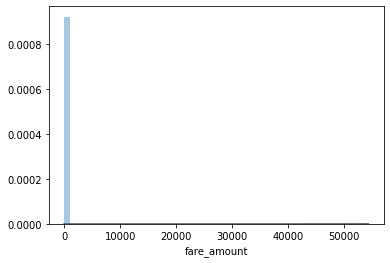

In [13]:
plot_fa = sns.distplot(training['fare_amount'],bins=50)

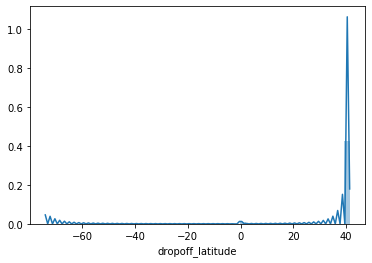

In [14]:
plot_drop_lat1= sns.distplot(training['dropoff_latitude'],bins=50)

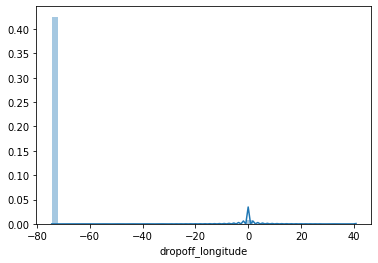

In [15]:
plot_drop_long1= sns.distplot(training['dropoff_longitude'],bins=50)

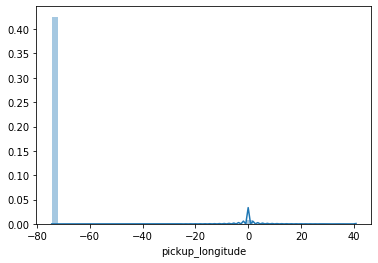

In [16]:
plot_pick_long1=sns.distplot(training['pickup_longitude'],bins=50)

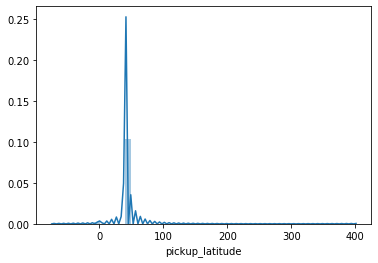

In [17]:
 sns.distplot(training['pickup_latitude'],bins=50)

In [18]:
sum(training['fare_amount']<1)

5

In [19]:
training[training['fare_amount']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.90,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.50,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1.0
2780,0.01,2015-05-01 15:38:41+00:00,-73.939041,40.713963,-73.941673,40.713997,1.0
10002,0.00,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0
13032,-3.00,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4.0


In [20]:
training = training.drop(training[training['fare_amount']<1].index, axis=0)

In [21]:
for i in range(4,11):
    sum(training['passenger_count']>i)

In [22]:
sum(training['passenger_count']>i)

20

In [23]:
for i in range(4,11):
    print('PASSENGER COUNT MORE THAN '  +str(i)+' ARE: {}'.format(sum(training['passenger_count']>i)))

PASSENGER COUNT MORE THAN 4 ARE: 1367
PASSENGER COUNT MORE THAN 5 ARE: 322
PASSENGER COUNT MORE THAN 6 ARE: 20
PASSENGER COUNT MORE THAN 7 ARE: 20
PASSENGER COUNT MORE THAN 8 ARE: 20
PASSENGER COUNT MORE THAN 9 ARE: 20
PASSENGER COUNT MORE THAN 10 ARE: 20


In [24]:
training[training['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35+00:00,0.000000,0.000000,0.000000,0.000000,236.0
263,4.9,2010-07-12 09:44:33+00:00,-73.983249,40.734655,-73.991278,40.738918,456.0
293,6.1,2011-01-18 23:48:00+00:00,-74.006642,40.738927,-74.010828,40.717907,5334.0
356,8.5,2013-06-18 10:27:05+00:00,-73.992108,40.764203,-73.973000,40.762695,535.0
386,8.1,2009-08-21 19:35:05+00:00,-73.960853,40.761557,-73.976335,40.748361,354.0
413,NaN,2013-09-12 11:32:00+00:00,-73.982060,40.772705,-73.956213,40.771777,55.0
971,10.1,2010-11-21 01:41:00+00:00,-74.004500,40.742143,-73.994330,40.720412,554.0
1007,3.7,2010-12-14 14:46:00+00:00,-73.969157,40.759000,-73.968763,40.764617,53.0
1043,5.7,2012-08-22 22:08:29+00:00,-73.973573,40.760184,-73.953564,40.767392,35.0
1107,4.9,2009-08-08 21:50:50+00:00,-73.988977,40.721068,-73.982368,40.732064,345.0


In [25]:
length_passenger_count=len(training[training['passenger_count']<1])

In [26]:
length_passenger_count

58

In [27]:
training = training.drop(training[training['passenger_count']>6].index, axis=0)

In [28]:
training

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00+00:00,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00+00:00,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07+00:00,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00+00:00,-73.957027,40.765945,-73.981983,40.779560,1.0


In [29]:
training = training.drop(training[training['passenger_count']<1].index, axis=0)

In [30]:
sum(training['passenger_count']>6)

0

In [31]:
training

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00+00:00,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00+00:00,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07+00:00,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00+00:00,-73.957027,40.765945,-73.981983,40.779560,1.0


In [32]:
training.shape

(15984, 7)

In [33]:
sum(training['pickup_longitude']>180)

0

In [34]:
sum(training['dropoff_longitude']>180)

0

In [35]:
sum(training['pickup_longitude']<-180)

0

In [36]:
sum(training['dropoff_longitude']<-180)

0

In [37]:
sum(training['pickup_latitude']>90)

1

In [38]:
sum(training['dropoff_latitude']>90)

0

In [39]:
sum(training['pickup_latitude']<-90)

0

In [40]:
sum(training['pickup_latitude']<-90)

0

In [41]:
training = training.drop(training[training['pickup_latitude']>90].index, axis=0)

In [42]:
training

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00+00:00,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00+00:00,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07+00:00,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00+00:00,-73.957027,40.765945,-73.981983,40.779560,1.0


In [43]:
zero_val=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

In [44]:
zero_val

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

In [45]:
for i in zero_val:
    training = training.drop(training[training[i]==0].index, axis=0)

In [46]:
training.shape

(15661, 7)

In [47]:
df=training.copy()

In [48]:
training=df.copy()

In [49]:
training.shape

(15661, 7)

In [50]:
mising_value = pd.DataFrame(training.isnull().sum())
mising_value


,0
fare_amount,22
pickup_datetime,1
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,55


In [51]:
mising_value = mising_value.reset_index()


In [52]:
mising_value

,index,0
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [53]:
mising_value = mising_value.rename(columns = {'index': 'Variable', 0: 'Missing_percentage'})
mising_value['Missing_percentage'] = (mising_value['Missing_percentage']/len(training))*100

In [54]:
mising_value

,Variable,Missing_percentage
0,fare_amount,0.140476
1,pickup_datetime,0.006385
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000
6,passenger_count,0.351191


In [55]:
a1=training['fare_amount'].loc[1000]
print('fare_amount at loc-1000:{}'.format(a1))
# Replacing 1.0 with NA
training['fare_amount'].loc[1000] = np.nan
print('Value after replacing with nan:{}'.format(training['fare_amount'].loc[1000]))
# Impute with mean
print('Value if imputed with mean:{}'.format(training['fare_amount'].fillna(training['fare_amount'].mean()).loc[1000]))
# Impute with median
print('Value if imputed with median:{}'.format(training['fare_amount'].fillna(training['fare_amount'].median()).loc[1000]))

fare_amount at loc-1000:7.0
Value after replacing with nan:nan
Value if imputed with mean:15.118196060877201
Value if imputed with median:8.5


C:\Users\Deepak\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [56]:

training.std()

fare_amount          435.982171
pickup_longitude       2.659050
pickup_latitude        2.613305
dropoff_longitude      2.710835
dropoff_latitude       2.632400
passenger_count        1.266066
dtype: float64

In [57]:
columns=['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']
#columns=['fare_amount','passenger_count']

In [58]:
columns

['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [59]:
pickup_datetime=pd.DataFrame(training['pickup_datetime'])

In [60]:
training = pd.DataFrame(KNN(k = 17).fit_transform(training.drop('pickup_datetime',axis=1)),columns=columns, index=training.index)


NameError: name 'KNN' is not defined

In [61]:
training['passenger_count']=training['passenger_count'].astype('int')

In [62]:
training['passenger_count']=training['passenger_count'].round().astype('object').astype('category',order=True)


In [63]:
training['passenger_count'].unique()

[1, 2, 3, 6, 5, 4]
Categories (6, int64): [1, 2, 3, 6, 5, 4]

In [64]:
# MISSING value analysis
missing_value = pd.DataFrame(pickup_datetime.isnull().sum())
missing_value = missing_value.reset_index()
missing_value

,index,0
0,pickup_datetime,1


In [65]:
pickup_datetime.shape

(15661, 1)

In [66]:
df_1=training.copy()
training=df_1.copy()

In [67]:
training.shape

(15661, 6)

In [68]:
training['passenger_count'].describe()

count     15661
unique        6
top           1
freq      11058
Name: passenger_count, dtype: int64

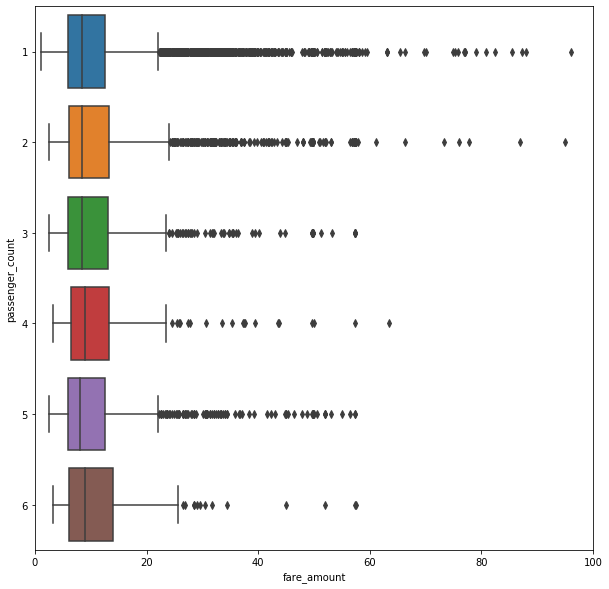

In [69]:

# BOXPLOT for outlier analysis
plt.figure(figsize=(10,10))
plt.xlim(0,100)
_ = sns.boxplot(x=training['fare_amount'],y=training['passenger_count'],data=training,orient='h')
plt.show()

In [70]:
training['passenger_count'].describe()

count     15661
unique        6
top           1
freq      11058
Name: passenger_count, dtype: int64

In [71]:
def outlier_analysis(columns):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(training[columns], [75 ,25])
    print(q75,q25)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
    #Replace with NA
    training.loc[training[columns] < minimum,columns] = np.nan
    training.loc[training[columns] > maximum,columns] = np.nan

In [72]:
outlier_analysis('fare_amount')

12.5 6.0
-3.75 22.25


In [73]:
pd.DataFrame(training.isnull().sum())

,0
fare_amount,1359
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [74]:
training.std()

fare_amount          4.136314
pickup_longitude     2.659050
pickup_latitude      2.613305
dropoff_longitude    2.710835
dropoff_latitude     2.632400
passenger_count      1.264337
dtype: float64

In [75]:
training = pd.DataFrame(KNN(k = 3).fit_transform(training), columns = training.columns, index=training.index) 

Imputing row 1/15661 with 0 missing, elapsed time: 478.252
Imputing row 101/15661 with 0 missing, elapsed time: 509.732
Imputing row 201/15661 with 0 missing, elapsed time: 513.857
Imputing row 301/15661 with 1 missing, elapsed time: 516.436
Imputing row 401/15661 with 0 missing, elapsed time: 523.478
Imputing row 501/15661 with 0 missing, elapsed time: 524.478
Imputing row 601/15661 with 1 missing, elapsed time: 524.962
Imputing row 701/15661 with 0 missing, elapsed time: 525.447
Imputing row 801/15661 with 0 missing, elapsed time: 526.275
Imputing row 901/15661 with 0 missing, elapsed time: 526.713
Imputing row 1001/15661 with 0 missing, elapsed time: 528.244
Imputing row 1101/15661 with 1 missing, elapsed time: 529.947
Imputing row 1201/15661 with 0 missing, elapsed time: 531.619
Imputing row 1301/15661 with 0 missing, elapsed time: 532.588
Imputing row 1401/15661 with 0 missing, elapsed time: 535.123
Imputing row 1501/15661 with 0 missing, elapsed time: 536.760
Imputing row 1601/15

Imputing row 13201/15661 with 0 missing, elapsed time: 619.194
Imputing row 13301/15661 with 0 missing, elapsed time: 620.163
Imputing row 13401/15661 with 0 missing, elapsed time: 624.513
Imputing row 13501/15661 with 0 missing, elapsed time: 627.000
Imputing row 13601/15661 with 1 missing, elapsed time: 627.350
Imputing row 13701/15661 with 0 missing, elapsed time: 627.732
Imputing row 13801/15661 with 0 missing, elapsed time: 628.110
Imputing row 13901/15661 with 0 missing, elapsed time: 628.188
Imputing row 14001/15661 with 0 missing, elapsed time: 629.304
Imputing row 14101/15661 with 0 missing, elapsed time: 630.168
Imputing row 14201/15661 with 0 missing, elapsed time: 630.994
Imputing row 14301/15661 with 0 missing, elapsed time: 631.246
Imputing row 14401/15661 with 0 missing, elapsed time: 631.727
Imputing row 14501/15661 with 1 missing, elapsed time: 632.655
Imputing row 14601/15661 with 0 missing, elapsed time: 633.252
Imputing row 14701/15661 with 0 missing, elapsed time: 

In [76]:
training['passenger_count']=training['passenger_count'].astype('int').round().astype('object').astype('category')

In [77]:
df_2 = training.copy()

In [78]:
training=df_2.copy()

In [79]:
training.shape

(15661, 6)

In [80]:
#######  FEATURE ENGINEERING########### done
training = pd.merge(pickup_datetime,training,right_index=True,left_index=True)

In [81]:
training.shape

(15661, 7)

In [82]:
training=training.reset_index(drop=True)

In [83]:
training.isna().sum()

pickup_datetime      1
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [84]:
pd.DataFrame(training.isna().sum())

,0
pickup_datetime,1
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [85]:
training=training.dropna()

In [86]:
training.shape

(15660, 7)

In [87]:
car_data = [training,testing]
for i in car_data:
    i["year"] = i["pickup_datetime"].apply(lambda row: row.year)
    i["month"] = i["pickup_datetime"].apply(lambda row: row.month)
    i["day_of_week"] = i["pickup_datetime"].apply(lambda row: row.dayofweek)
    i["hour"] = i["pickup_datetime"].apply(lambda row: row.hour)

In [88]:
def function1(x):
    '''  HOUR COLUMN SESSION '''
    if (x >=5) and (x <= 11):
        return 'morning'
    elif (x >=12) and (x <=16 ):
        return 'afternoon'
    elif (x >= 17) and (x <= 20):
        return'evening'
    elif (x >=21) and (x <= 23) :
        return 'night_PM'
    elif (x >=0) and (x <=4):
        return'night_AM'

In [89]:
def function2(x):
    ''' MONTH COLUMN (YEAR SEASON)'''
    if (x >=3) and (x <= 5):
        return 'spring'
    elif (x >=6) and (x <=8 ):
        return 'summer'
    elif (x >= 9) and (x <= 11):
        return'fall'
    elif (x >=12)|(x <= 2) :
        return 'winter'

In [90]:
def function3(x):
    '''  DAY OF WEEK COLUMN '''
    if (x >=0) and (x <= 4):
        return 'weekday'
    elif (x >=5) and (x <=6 ):
        return 'weekend'

In [91]:
training['session'] = training['hour'].apply(function1)
training['week'] = training['day_of_week'].apply(function3)
training['seasons'] = training['month'].apply(function2)

In [92]:
testing['session'] = testing['hour'].apply(function1)
testing['week'] = testing['day_of_week'].apply(function3)
testing['seasons'] = testing['month'].apply(function2)

In [93]:
training.shape


(15660, 14)

In [94]:
testing.shape

(9914, 13)

In [95]:
dummy_var = pd.get_dummies(testing['year'], prefix = 'year')
testing = testing.join(dummy_var)

dummy_var = pd.get_dummies(training['year'], prefix = 'year')
training = training.join(dummy_var)

dummy_var = pd.get_dummies(training['session'], prefix = 'session')
training = training.join(dummy_var)

dummy_var = pd.get_dummies(testing['session'], prefix = 'session')
testing = testing.join(dummy_var)

dummy_var = pd.get_dummies(training['week'], prefix = 'week')
training = training.join(dummy_var)

dummy_var = pd.get_dummies(testing['week'], prefix = 'week')
testing = testing.join(dummy_var)

dummy_var = pd.get_dummies(training['seasons'], prefix = 'season')
training = training.join(dummy_var)

dummy_var = pd.get_dummies(testing['seasons'], prefix = 'season')
testing = testing.join(dummy_var)

dummy_var = pd.get_dummies(training['passenger_count'], prefix = 'passenger_count')
training = training.join(dummy_var)

dummy_var = pd.get_dummies(testing['passenger_count'], prefix = 'passenger_count')
testing = testing.join(dummy_var)

In [96]:
x=training.columns

In [97]:
x

Index(['pickup_datetime', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'week', 'seasons',
       'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015', 'session_afternoon', 'session_evening',
       'session_morning', 'session_night_AM', 'session_night_PM',
       'week_weekday', 'week_weekend', 'season_fall', 'season_spring',
       'season_summer', 'season_winter', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6'],
      dtype='object')

In [98]:
training=training.drop(['passenger_count_1','season_fall','week_weekday','session_afternoon','year_2009'],axis=1)


In [99]:
testing=testing.drop(['passenger_count_1','season_fall','week_weekday','session_afternoon','year_2009'],axis=1)

In [100]:
testing.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'week', 'seasons',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'week_weekend', 'season_spring', 'season_summer',
       'season_winter', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6'],
      dtype='object')

In [101]:
car_data = [training,testing]
for i in car_data:
    i['great_circle']=i.apply(lambda x: great_circle((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],   x['dropoff_longitude'])).miles, axis=1)
    i['geodesic']=i.apply(lambda x: geodesic((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],   x['dropoff_longitude'])).miles, axis=1)

In [102]:
training=training.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'seasons', 'week','great_circle'],axis=1)
testing=testing.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'seasons', 'week','great_circle'],axis=1)



In [103]:
training.shape

(15660, 21)

In [104]:
testing.shape

(9914, 20)

In [105]:
#pd.DataFrame(training.isna().sum())

In [106]:
#pd.DataFrame(testing.isna().sum())

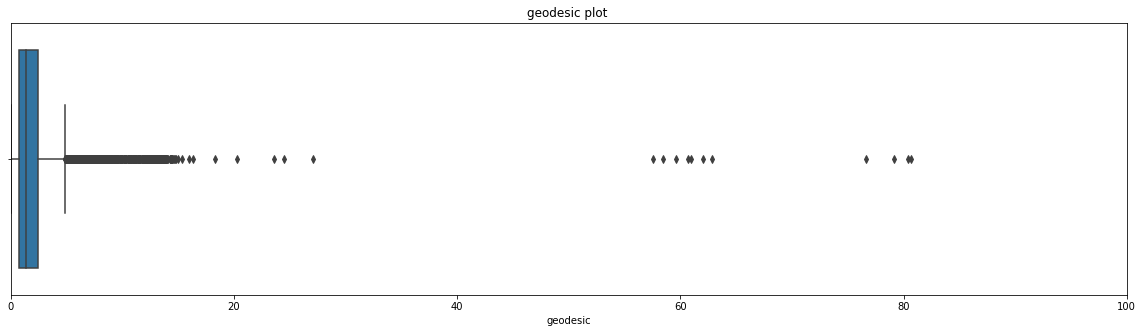

In [107]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=training['geodesic'],data=training,orient='h')
plt.title('geodesic plot ')
plt.show()

In [108]:
outlier_analysis('geodesic')

2.425668049965582 0.7815214474966259
-1.6846984562068081 4.891887953669016


In [109]:
pd.DataFrame(training.isnull().sum())

,0
fare_amount,0
year_2010,0
year_2011,0
year_2012,0
year_2013,0
year_2014,0
year_2015,0
session_evening,0
session_morning,0
session_night_AM,0


In [110]:
#Impute  missing values by applying KNN
training = pd.DataFrame(KNN(k = 3).fit_transform(training), columns = training.columns, index=training.index)

Imputing row 1/15660 with 0 missing, elapsed time: 570.215
Imputing row 101/15660 with 0 missing, elapsed time: 609.841
Imputing row 201/15660 with 0 missing, elapsed time: 624.172
Imputing row 301/15660 with 1 missing, elapsed time: 626.391
Imputing row 401/15660 with 0 missing, elapsed time: 628.406
Imputing row 501/15660 with 0 missing, elapsed time: 629.547
Imputing row 601/15660 with 1 missing, elapsed time: 630.094
Imputing row 701/15660 with 0 missing, elapsed time: 632.125
Imputing row 801/15660 with 0 missing, elapsed time: 633.672
Imputing row 901/15660 with 0 missing, elapsed time: 634.782
Imputing row 1001/15660 with 0 missing, elapsed time: 635.626
Imputing row 1101/15660 with 1 missing, elapsed time: 637.251
Imputing row 1201/15660 with 0 missing, elapsed time: 638.872
Imputing row 1301/15660 with 0 missing, elapsed time: 640.339
Imputing row 1401/15660 with 0 missing, elapsed time: 641.956
Imputing row 1501/15660 with 0 missing, elapsed time: 642.723
Imputing row 1601/15

Imputing row 13501/15660 with 0 missing, elapsed time: 730.324
Imputing row 13601/15660 with 0 missing, elapsed time: 731.490
Imputing row 13701/15660 with 0 missing, elapsed time: 732.423
Imputing row 13801/15660 with 0 missing, elapsed time: 733.222
Imputing row 13901/15660 with 0 missing, elapsed time: 733.225
Imputing row 14001/15660 with 0 missing, elapsed time: 733.228
Imputing row 14101/15660 with 0 missing, elapsed time: 733.257
Imputing row 14201/15660 with 0 missing, elapsed time: 733.260
Imputing row 14301/15660 with 0 missing, elapsed time: 733.263
Imputing row 14401/15660 with 0 missing, elapsed time: 733.268
Imputing row 14501/15660 with 1 missing, elapsed time: 733.272
Imputing row 14601/15660 with 0 missing, elapsed time: 733.279
Imputing row 14701/15660 with 0 missing, elapsed time: 733.307
Imputing row 14801/15660 with 0 missing, elapsed time: 733.430
Imputing row 14901/15660 with 0 missing, elapsed time: 733.862
Imputing row 15001/15660 with 1 missing, elapsed time: 

In [111]:
var_categorical=['passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'season_spring', 'season_summer',
       'season_winter', 'week_weekend',
       'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'year_2010', 'year_2011',
       'year_2012', 'year_2013', 'year_2014', 'year_2015']
var_numerical=['fare_amount','geodesic']
training[var_categorical]=training[var_categorical].apply(lambda x: x.astype('category') )
testing[var_categorical]=testing[var_categorical].apply(lambda x: x.astype('category') )

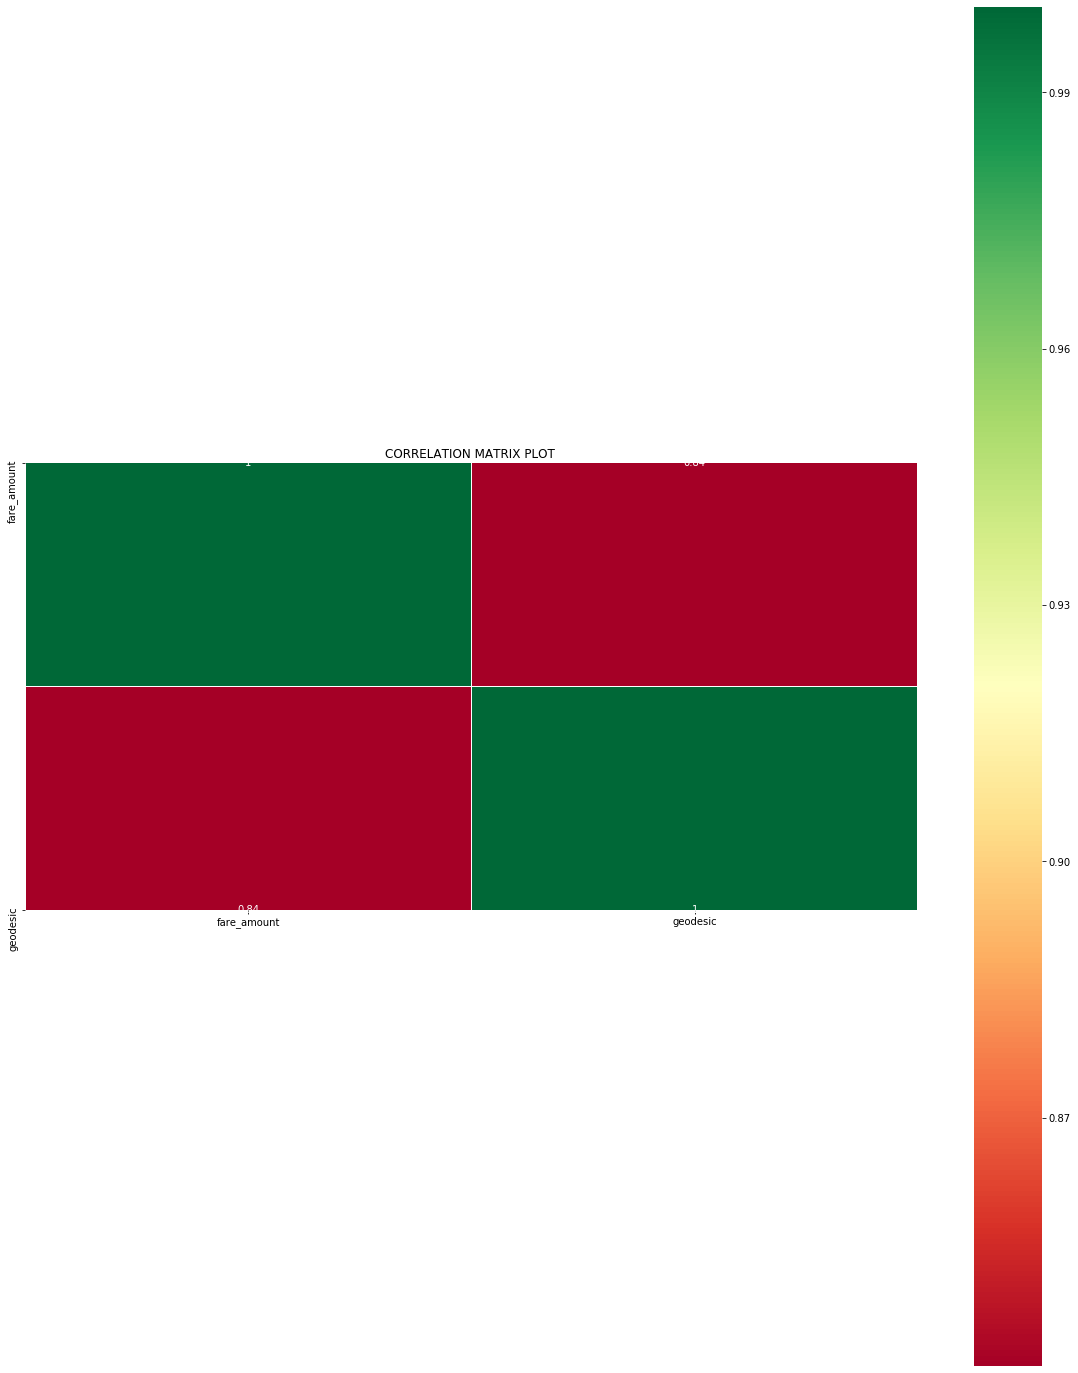

In [112]:
# heatmap plot  correlation matrix
plt.figure(figsize=(20,25))
_ = sns.heatmap(training[var_numerical].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('CORRELATION MATRIX PLOT ')
plt.show()

In [113]:
# chi square test 
for i in var_categorical:
    for j in var_categorical:
        if(i != j):
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(training[i], training[j]))
            if(p < 0.05):
                print(i,",",j,"are dependent on each other with",p,':Eliminate')
            else:
                print(i,",",j,"are independent on each other with",p,':Retain')

passenger_count_2 , passenger_count_3 are dependent on each other with 1.820132432926869e-27 :Eliminate
passenger_count_2 , passenger_count_4 are dependent on each other with 1.1929671757972803e-13 :Eliminate
passenger_count_2 , passenger_count_5 are dependent on each other with 1.1339005653493428e-42 :Eliminate
passenger_count_2 , passenger_count_6 are dependent on each other with 1.0622556883488593e-12 :Eliminate
passenger_count_2 , season_spring are independent on each other with 0.966028847581576 :Retain
passenger_count_2 , season_summer are dependent on each other with 0.022816072292396496 :Eliminate
passenger_count_2 , season_winter are independent on each other with 0.5033457371106519 :Retain
passenger_count_2 , week_weekend are dependent on each other with 5.393179090345944e-11 :Eliminate
passenger_count_2 , session_evening are dependent on each other with 0.01884692149256251 :Eliminate
passenger_count_2 , session_morning are dependent on each other with 1.5585431051820502e-16 

season_spring , passenger_count_2 are independent on each other with 0.966028847581576 :Retain
season_spring , passenger_count_3 are independent on each other with 0.25400771054609933 :Retain
season_spring , passenger_count_4 are independent on each other with 0.1852585488275776 :Retain
season_spring , passenger_count_5 are dependent on each other with 0.03952059871407807 :Eliminate
season_spring , passenger_count_6 are independent on each other with 0.9148172621932616 :Retain
season_spring , season_summer are dependent on each other with 0.0 :Eliminate
season_spring , season_winter are dependent on each other with 0.0 :Eliminate
season_spring , week_weekend are independent on each other with 0.7961003257905971 :Retain
season_spring , session_evening are independent on each other with 0.814055875892082 :Retain
season_spring , session_morning are independent on each other with 0.056579031369672135 :Retain
season_spring , session_night_AM are independent on each other with 0.591830628965

session_morning , season_winter are independent on each other with 0.8265071653243 :Retain
session_morning , week_weekend are dependent on each other with 1.5044462337151303e-38 :Eliminate
session_morning , session_evening are dependent on each other with 0.0 :Eliminate
session_morning , session_night_AM are dependent on each other with 3.155991736009208e-155 :Eliminate
session_morning , session_night_PM are dependent on each other with 2.9392958051513584e-223 :Eliminate
session_morning , year_2010 are independent on each other with 0.142703105373831 :Retain
session_morning , year_2011 are independent on each other with 0.5969002979289719 :Retain
session_morning , year_2012 are independent on each other with 0.5704676134138488 :Retain
session_morning , year_2013 are independent on each other with 0.9895086215198182 :Retain
session_morning , year_2014 are independent on each other with 0.7786690545466206 :Retain
session_morning , year_2015 are independent on each other with 0.8914579981

year_2012 , season_summer are dependent on each other with 0.0009517353086692014 :Eliminate
year_2012 , season_winter are independent on each other with 0.36911913812354513 :Retain
year_2012 , week_weekend are independent on each other with 0.06241333877145238 :Retain
year_2012 , session_evening are independent on each other with 0.783339953119807 :Retain
year_2012 , session_morning are independent on each other with 0.5704676134138488 :Retain
year_2012 , session_night_AM are independent on each other with 0.11485579116237404 :Retain
year_2012 , session_night_PM are independent on each other with 0.5013588215940806 :Retain
year_2012 , year_2010 are dependent on each other with 1.1759987383264199e-120 :Eliminate
year_2012 , year_2011 are dependent on each other with 1.4752668060307697e-119 :Eliminate
year_2012 , year_2013 are dependent on each other with 4.2761833719413305e-123 :Eliminate
year_2012 , year_2014 are dependent on each other with 6.728095040408982e-112 :Eliminate
year_2012 

In [114]:
model_anova = ols('fare_amount ~ C(passenger_count_2)+C(passenger_count_3)+C(passenger_count_4)+C(passenger_count_5)+C(passenger_count_6)+C(season_spring)+C(season_summer)+C(season_winter)+C(week_weekend)+C(session_night_AM)+C(session_night_PM)+C(session_evening)+C(session_morning)+C(year_2010)+C(year_2011)+C(year_2012)+C(year_2013)+C(year_2014)+C(year_2015)',data=training).fit()
                
table_anova = sm.stats.anova_lm(model_anova)

In [115]:
table_anova 

,df,sum_sq,mean_sq,F,PR(>F)
C(passenger_count_2),1.0,11.408070,11.408070,0.589021,4.428093e-01
C(passenger_count_3),1.0,17.122277,17.122277,0.884057,3.471073e-01
C(passenger_count_4),1.0,65.432347,65.432347,3.378403,6.607499e-02
C(passenger_count_5),1.0,21.209367,21.209367,1.095082,2.953641e-01
C(passenger_count_6),1.0,146.015783,146.015783,7.539087,6.044362e-03
C(season_spring),1.0,29.067424,29.067424,1.500809,2.205653e-01
C(season_summer),1.0,26.836252,26.836252,1.385609,2.391659e-01
C(season_winter),1.0,481.921082,481.921082,24.882549,6.158507e-07
C(week_weekend),1.0,130.551478,130.551478,6.740634,9.432927e-03
C(session_night_AM),1.0,2131.440029,2131.440029,110.050509,1.162302e-25


In [116]:
# _1+passenger_count_2+passenger_count_3+passenger_count_4+passenger_count_5+passenger_count_6
outcome, predictors = dmatrices('fare_amount ~ geodesic+passenger_count_2+passenger_count_3+passenger_count_4+passenger_count_5+passenger_count_6+season_spring+season_summer+season_winter+week_weekend+session_night_AM+session_night_PM+session_evening+session_morning+year_2010+year_2011+year_2012+year_2013+year_2014+year_2015',training, return_type='dataframe')
# calculating VIF for each individual Predictors
vi_factor = pd.DataFrame()
vi_factor["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vi_factor["features"] = predictors.columns


In [117]:
vif

NameError: name 'vif' is not defined

In [118]:
training[var_numerical].var()

fare_amount    20.046257
geodesic        1.231759
dtype: float64

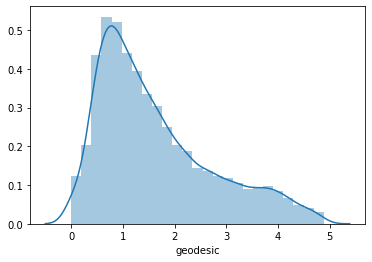

In [119]:
sns.distplot(training['geodesic'],bins=25)

In [120]:
#Normalization
training['geodesic'] = (training['geodesic'] - min(training['geodesic']))/(max(training['geodesic']) - min(training['geodesic']))
testing['geodesic'] = (testing['geodesic'] - min(testing['geodesic']))/(max(testing['geodesic']) - min(testing['geodesic']))

In [121]:
training['geodesic'].var()

0.051538292963903935

((array([-3.92007182, -3.70085568, -3.58076887, ...,  3.58076887,
          3.70085568,  3.92007182]),
  array([0.        , 0.        , 0.        , ..., 0.99882442, 0.99916812,
         1.        ])),
 (0.21714432266830297, 0.3328274453601052, 0.9562991159622729))

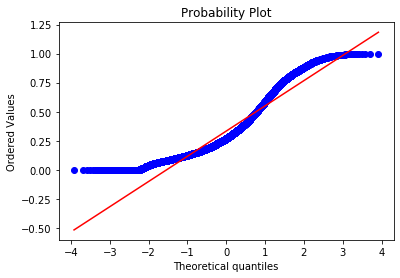

In [122]:
stats.probplot(training['geodesic'], dist='norm', fit=True,plot=plt)

In [126]:
df_4=training.copy()
training=df_4.copy()


In [127]:
df5=testing.copy()
testing=df5.copy()

In [128]:
training=training.drop(['passenger_count_2'],axis=1)
testing=testing.drop(['passenger_count_2'],axis=1)

In [129]:
X = training.drop('fare_amount',axis=1).values
y = training['fare_amount'].values
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size = 0.25, random_state=42)
print(training.shape, X_training.shape, X_testing.shape,y_training.shape,y_testing.shape)

(15660, 20) (11745, 19) (3915, 19) (11745,) (3915,)


In [130]:
def rmsle(y1,y2):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y1]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y2]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
def scores(y1, y2):
    print('r square  ', metrics.r2_score(y1, y2))
    #print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y1, y2))*(len(y1)-1)/(len(y1)-X_training.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.abs((y1 - y2) / y1))*100))
    print('MSE:', metrics.mean_squared_error(y1, y2))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y1, y2))) 
def test_scores(model):
    print('Training Data Details')
    print()
    #Predicting result on Training data
    y_pred = model.predict(X_training)
    scores(y_training,y_pred)
    print('RMSLE:',rmsle(y_training,y_pred))
    print()
    print(' Testing Data Details')
    print()
    # Evaluating on Test Set
    y_predict = model.predict(X_testing)
    scores(y_testing,y_predict)
    print('RMSLE:',rmsle(y_testing,y_predict))

In [131]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'copy_X':[True, False],
          'fit_intercept':[True,False]}
# Instantiate a Decision reg classifier: reg
reg = LinearRegression()

# Instantiate the gridSearchCV object: reg_cv
reg_cv = GridSearchCV(reg, param_dist, cv=5,scoring='r2')

# Fit it to the data
reg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision reg Parameters: {}".format(reg_cv.best_params_))
print("Best score is {}".format(reg_cv.best_score_))

Tuned Decision reg Parameters: {'copy_X': True, 'fit_intercept': True}
Best score is 0.7348677534948158


R^2: 0.7409311855906986
Root Mean Squared Error: 2.304846156476875
Training Data Details

r square   0.7338718419649115
MAPE:18.751713503917866
MSE: 5.293642518548715
RMSE: 2.300791715594594
RMSLE: 0.21668516998500975

 Testing Data Details

r square   0.7409311855906986
MAPE:18.99192090773019
MSE: 5.312315805026223
RMSE: 2.304846156476875
RMSLE: 0.21573690854743632
[-7.50639948e-02 -1.16099436e-02  4.31789866e-01  1.28584090e+00
  1.50655725e+00  1.74872973e+00 -4.01899963e-01 -4.55919530e-01
 -6.75867346e-01 -7.91496001e-01 -2.12162667e-01 -4.39697520e-01
 -4.36543680e-01 -4.72871438e-01  1.65003730e-01  2.42190898e-01
  2.30223902e-01  2.01924602e-01  1.67301496e+01]


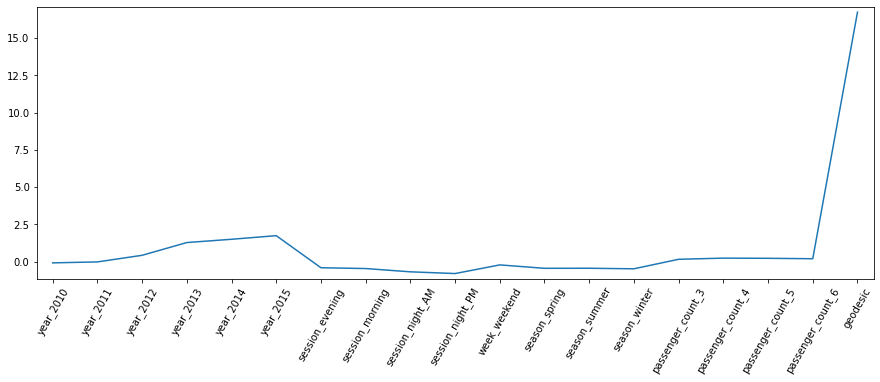

In [132]:
# Create the regressor: reg_all
reg_all = LinearRegression(copy_X= True, fit_intercept=True)

# Fit the regressor to the training data
reg_all.fit(X_training,y_training)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_testing)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_testing, y_testing)))
rmse = np.sqrt(mean_squared_error(y_testing,y_pred))
print("Root Mean Squared Error: {}".format(rmse))
test_scores(reg_all)

# Compute and print the coefficients
reg_coef = reg_all.coef_
print(reg_coef)

# Plot the coefficients
plt.figure(figsize=(15,5))
plt.plot(range(len(testing.columns)), reg_coef)
plt.xticks(range(len(testing.columns)), testing.columns.values, rotation=60)
plt.margins(0.02)
plt.savefig('linear coefficients')
plt.show()

In [137]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

# Instantiate a Decision Tree classifier: tree
dec_tree = DecisionTreeRegressor()

# Instantiate the gridSearchCV object: tree_cv
dec_tree_cv = GridSearchCV(dec_tree, param_dist, cv=5)

# Fit it to the data
dec_tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dec_tree_cv.best_params_))
print("Best score is {}".format(dec_tree_cv.best_score_))

# Instantiate a tree regressor: tree
dec_tree = DecisionTreeRegressor(max_depth= 6, min_samples_split=2)

# Fit the regressor to the data
dec_tree.fit(X_training,y_training)

# Compute and print the coefficients
dec_tree_features = dec_tree.feature_importances_
print(dec_tree_features)

# Sort test importances in descending order
tree_indices = np.argsort(dec_tree_features)[::1]

# Rearrange test names so they match the sorted test importances
names_col = [testing.columns[i] for i in tree_indices]

test_scores(dec_tree)

Tuned Decision Tree Parameters: {'max_depth': 6, 'min_samples_split': 6}
Best score is 0.7315931169967852
[0.00000000e+00 0.00000000e+00 3.56093721e-04 1.15977956e-02
 1.19136767e-02 9.57782403e-03 3.67971748e-04 0.00000000e+00
 0.00000000e+00 9.04900424e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.87453195e-04 1.44118007e-04 1.03649078e-04
 1.21925071e-04 4.68618688e-04 9.64770384e-01]
Training Data Details

r square   0.7457182342174193
MAPE:18.568099750553237
MSE: 5.0580020429887655
RMSE: 2.2490002318783264
RMSLE: 0.20912873163544968

 Testing Data Details

r square   0.739695709486023
MAPE:19.156471529266362
MSE: 5.337649766014794
RMSE: 2.3103354228368644
RMSLE: 0.21276123055020005
